In [1]:
import scipy as sp
import scipy.io
import scipy.stats
import os
import numpy as np
import pandas as pd
import glob
import random as rand
from tqdm import tnrange, tqdm_notebook
import sys
sys.path.append(os.getcwd()+'\\..')
import cmocean
from utils import utils
from utils import zscores## If exporting figures for adobe illustrator
# import plot_utils_fig5 as pu
from utils import auc_methods
import matplotlib.pylab as mpl
import matplotlib.patches as patches
# %cd ../crossmodal/Figure5
# import plot_utils_fig5 as pu 
%load_ext autoreload
%autoreload 2

In [ ]:
DATA_DIR = os.path.abspath('../data')
log_df = pd.read_hdf(os.path.join(DATA_DIR, 'log_df_processed_02-28-2019.h5'), 'fixed')
unit_key_df = pd.read_hdf(os.path.join(DATA_DIR, 'unit_key_df_processed_02-28-2019.h5'), 'fixed')

In [2]:
bin_size = 0.025
window = [-1, 3]
edges = np.arange(window[0], window[1], bin_size)
log_df = log_df[log_df['mouse_name'] != 'EF0074'].reset_index(drop=True) ##EF0074 wasnt trained with short stims
unit_key_df = unit_key_df[unit_key_df['mouse_name'] != 'EF0074'].reset_index(drop=True)
log_df.shape

C:\Users\efink\Documents\Github\crossmodal\Figure3\..\utils\utils.py:36: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  licks = licks.applymap(lambda y: y[[0.1<y]] if len(y) > 0 else y)
C:\Users\efink\Documents\Github\crossmodal\Figure3\..\utils\utils.py:37: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  licks = licks.applymap(lambda y: y[[3>=y]] if len(y) > 0 else y)


(786362, 21)

In [3]:
log_df['spike_counts(stim_aligned)'] = log_df[
    'spike_times(stim_aligned)'].apply(lambda x: np.histogram(x,edges)[0]/bin_size)

In [4]:
# log_df.to_hdf('log_df_processed.h5', 'table')
# unit_key_df.to_hdf('unit_key_df_processed.h5', 'table')

In [5]:
# log_df = pd.read_hdf('log_df_processed.h5', 'table')
# unit_key_df = pd.read_hdf('unit_key_df_processed.h5', 'table')


In [6]:
%cd ../../calculate_choice_prob

C:\Users\efink\Documents\Github\calculate_choice_prob


In [7]:
import calculate_auc as ca

In [8]:
utils.get_uni_id(unit_key_df, 'EF0079', '03-22-16', 'TT4clst2')

C:\Users\efink\Documents\Github\crossmodal\Figure3\..\utils\utils.py:366: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  return unit_key_df.merge(key)['uni_id'].as_matrix()[0]


'07903-22-164t2'

In [9]:
%pdb

Automatic pdb calling has been turned ON


In [10]:
v_lick_no_lick = ca.calculate_small_batch(log_df, unit_key_df, ['07903-22-164t2'], trial_type = 'Stim_Vis_NoCue', comparison = 'stim_prob_visual')
t_lick_no_lick = ca.calculate_small_batch(log_df, unit_key_df, ['07903-22-164t2'], trial_type = 'Stim_Som_NoCue', comparison = 'stim_prob_touch')

v_1cyc_lick_no_lick = ca.calculate_small_batch(log_df, unit_key_df, ['07903-22-164t2'], trial_type = '1CycStim_Vis_NoCue', comparison = 'stim_prob_visual')
t_1cyc_lick_no_lick = ca.calculate_small_batch(log_df, unit_key_df, ['07903-22-164t2'], trial_type = '1CycStim_Som_NoCue', comparison = 'stim_prob_touch')

In [11]:
window = [-0.25, 0.775]
binsize = 0.025

C:\Users\efink\Anaconda3\envs\crossmodal\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\efink\Anaconda3\envs\crossmodal\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\efink\Anaconda3\envs\crossmodal\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\efink\Anaconda3\envs\crossmodal\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\efink\Anaconda3\envs\crossmodal\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\efink\Anaconda3\envs\crossmodal\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Method .as_matrix wi

Text(0.4, 0.1, 'Short visual-lick/no lick')

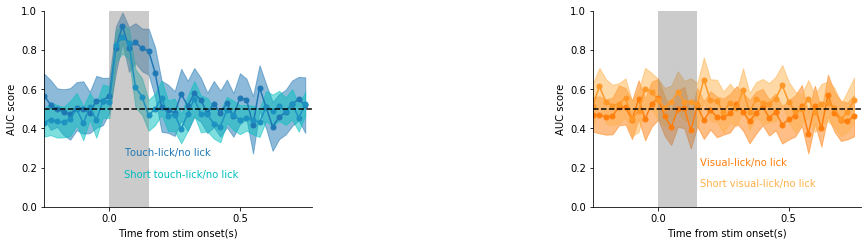

In [12]:
## need to subtract 1 bin from both ends because np.histogram counts spikes occuring from and including
## the bin label up to but not including the label for bin+1 - this would make it look like activity 
## starts before the stimulus onset.
offset = np.abs(-1/bin_size)
start = int(offset + (window[0]/bin_size))
stop = int(offset + (window[1]/bin_size))

edges = np.arange(window[0],window[1],bin_size)
fig = mpl.figure(figsize=(18, 4))
fig.subplots_adjust(bottom=0.2, left = 0.2, right = 0.83, wspace = 1.05)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

unit_ind =  t_lick_no_lick['uni_id'] == '07903-22-164t2'
# unit_row = cp_df[cp_df['uni_id'] == uni_id]

t_long_cp_aucs =  t_lick_no_lick.loc[unit_ind,  t_lick_no_lick.columns.str.contains('auc')].as_matrix()[0]
t_long_cp_upper =  t_lick_no_lick.loc[unit_ind,  t_lick_no_lick.columns.str.contains('up')].as_matrix()[0]
t_long_cp_lower =  t_lick_no_lick.loc[unit_ind,  t_lick_no_lick.columns.str.contains('low')].as_matrix()[0]
v_long_cp_aucs = v_lick_no_lick.loc[unit_ind, v_lick_no_lick.columns.str.contains('auc')].as_matrix()[0]
v_long_cp_upper = v_lick_no_lick.loc[unit_ind, v_lick_no_lick.columns.str.contains('up')].as_matrix()[0]
v_long_cp_lower = v_lick_no_lick.loc[unit_ind, v_lick_no_lick.columns.str.contains('low')].as_matrix()[0]

t_short_cp_aucs = t_1cyc_lick_no_lick.loc[unit_ind, t_1cyc_lick_no_lick.columns.str.contains('auc')].as_matrix()[0]
t_short_cp_upper = t_1cyc_lick_no_lick.loc[unit_ind, t_1cyc_lick_no_lick.columns.str.contains('up')].as_matrix()[0]
t_short_cp_lower = t_1cyc_lick_no_lick.loc[unit_ind, t_1cyc_lick_no_lick.columns.str.contains('low')].as_matrix()[0]
v_short_cp_aucs = v_1cyc_lick_no_lick.loc[unit_ind, v_1cyc_lick_no_lick.columns.str.contains('auc')].as_matrix()[0]
v_short_cp_upper = v_1cyc_lick_no_lick.loc[unit_ind, v_1cyc_lick_no_lick.columns.str.contains('up')].as_matrix()[0]
v_short_cp_lower = v_1cyc_lick_no_lick.loc[unit_ind, v_1cyc_lick_no_lick.columns.str.contains('low')].as_matrix()[0]

# t_late_onset = list(unit_row['touchL_cp_onset'])
# t_late_onset_1cyc = list(unit_row['touchS_cp_onset'])
# v_late_onset = list(unit_row['visL_cp_onset'])
# v_late_onset_1cyc = list(unit_row['visS_cp_onset'])

ax1.add_patch(patches.Rectangle((0,0), 0.15, 1, facecolor = 'C7', alpha = 0.4))

# from IPython.core.debugger import Tracer; Tracer()() 

ax1.plot(edges, t_long_cp_aucs, 'o-',color = 'C0', markersize = 5)
# ax1.plot([t_late_onset]*2, [0,1], '--', color = 'C0')
ax1.fill_between(edges, t_long_cp_lower.astype(float),
                 t_long_cp_upper.astype(float), alpha = 0.5,
                 color = 'C0')

ax2.add_patch(patches.Rectangle((0,0), 0.15, 1, facecolor = 'C7', alpha = 0.4))
ax2.plot(edges, v_long_cp_aucs, 'o-', color = 'C1',  markersize = 5)
# ax2.plot([v_late_onset]*2, [0,1],color = 'C1')
ax2.fill_between(edges, v_long_cp_lower.astype(float),
                 v_long_cp_upper.astype(float), alpha = 0.5,
                 color = 'C1')

ax1.plot(edges, t_short_cp_aucs, 'o-',color = '#1d91c0', markersize = 5)
# ax1.plot([t_late_onset_1cyc]*2, [0,1],color = 'c')
ax1.fill_between(edges, t_short_cp_lower.astype(float),
                 t_short_cp_upper.astype(float), alpha = 0.5,
                 color = 'c')

ax2.plot(edges, v_short_cp_aucs, 'o-', color = '#fe9929', markersize = 5)
# ax2.plot([v_late_onset_1cyc]*2, [0,1],color = '#feb24c')
ax2.fill_between(edges, v_short_cp_lower.astype(float),
                 v_short_cp_upper.astype(float), alpha = 0.5,
                 color = '#feb24c')

for ax in [ax1, ax2]:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.set_xlim(window[0], window[1])
    ax.set_ylim([0,1])
    ax.set_xlabel('Time from stim onset(s)')
    ax.set_ylabel('AUC score')
    ax.plot(ax.get_xlim(), [0.5, 0.5], linestyle = '--', color = 'k' )
    ax.set_xticks([0,0.5])
ax1.text(.3, .26, "Touch-lick/no lick",transform=ax1.transAxes, color = 'C0')
ax1.text(.3, .15, "Short touch-lick/no lick",transform=ax1.transAxes, color = 'c')

ax2.text(.4, .21, "Visual-lick/no lick",transform=ax2.transAxes, color = 'C1')
ax2.text(.4, .1, "Short visual-lick/no lick",transform=ax2.transAxes, color = '#feb24c')

In [13]:
# fig.savefig('fig5a_5.pdf', format='pdf', dpi=900)

In [17]:
t_short_cp_lower>0.5

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True])

In [18]:
t_short_cp_lower

array([0.49896694, 0.53411458, 0.52023871, 0.50985989, 0.54089027,
       0.58178054, 0.51167618, 0.58163265, 0.52842377, 0.62454593,
       0.61538462, 0.90078125, 0.9309808 , 0.90890269, 0.70225013,
       0.65607235, 0.54496124, 0.57849294, 0.64505208, 0.54307213,
       0.55285191, 0.47364341, 0.56593407, 0.64218993, 0.56973684,
       0.55529716, 0.50414079, 0.49068323, 0.56120868, 0.54246795,
       0.51854796, 0.52052632, 0.51666667, 0.49894012, 0.59083558,
       0.57291126, 0.59220986, 0.55864037, 0.60026042, 0.52342048,
       0.58684211])

In [20]:
t_short_cp_upper

array([0.35865633, 0.36565978, 0.35326087, 0.35473684, 0.36053719,
       0.41706412, 0.33927649, 0.44602273, 0.35297158, 0.4548521 ,
       0.45303581, 0.73958333, 0.78338509, 0.75260417, 0.50677083,
       0.46964193, 0.38817149, 0.41666667, 0.47052632, 0.38618524,
       0.38527132, 0.32407407, 0.38791322, 0.46694215, 0.38026316,
       0.38531396, 0.34832041, 0.32919255, 0.42766296, 0.39224806,
       0.37083333, 0.38888889, 0.36954023, 0.35635793, 0.43842105,
       0.41041667, 0.43884298, 0.41758242, 0.44557292, 0.38401661,
       0.46441654])

In [21]:
t_long_cp_upper

array([0.45419103, 0.39249493, 0.40814394, 0.36571429, 0.34285714,
       0.39130435, 0.37310606, 0.37692308, 0.40384615, 0.4168242 ,
       0.48214286, 0.68602151, 0.83806818, 0.68903592, 0.73511905,
       0.69230769, 0.675     , 0.56042885, 0.38269231, 0.37784091,
       0.36174242, 0.44152047, 0.38709677, 0.45808967, 0.43478261,
       0.37698413, 0.40761905, 0.35769231, 0.40669371, 0.35769231,
       0.42261905, 0.44857143, 0.27192982, 0.49019608, 0.40056818,
       0.28571429, 0.34571429, 0.36956522, 0.41304348, 0.44139887,
       0.37712665])